Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


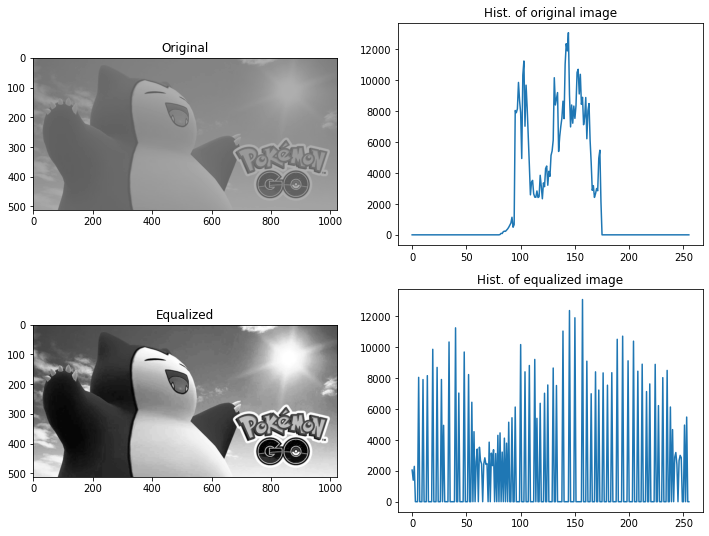

In [16]:
# Import drive from google.colab package
from google.colab import drive
# Import os and sys modules
import os, sys

# Mount Google Drive
drive.mount('/content/drive')
# Assume a folder "images" has been created, go to the folder "images"
os.chdir('/content/drive/My Drive/images')
# Add the path for interpreter to search
sys.path.append('/content/drive/My Drive/images')

# Import all the required libraries
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read the image
img = mpimg.imread('snorlax-low-contrast.png')

# Prepare subplots
fig = plt.figure(figsize=(12,9))
fig.tight_layout(); 
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# Add the image to the first row, first col
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ax1 = fig.add_subplot(2, 2, 1)
ax1.title.set_text("Original")
plt.imshow(gImg, cmap='gray', vmin=0, vmax=1)

# Convert pixel values from [0,1] to [0,255]
gImgUint = gImg*255
gImgUint = gImgUint.astype(np.uint8)
# Produce histogram
hist1 = cv2.calcHist([gImgUint], 
                     [0], None, [256], [0,255])

# Add the image to the first row, second col                     
ax2 = fig.add_subplot(2, 2, 2)
ax2.title.set_text('Hist. of original image')
plt.plot(hist1);

# Produce cumulative histogram
cumHist = np.cumsum(hist1)
cumMax = np.max(cumHist)
table = np.array((cumHist/np.max(cumHist))*255, 
                  np.uint8)
equalizedImg = cv2.LUT(gImgUint, table)
# Add the image to the second row, first col
ax3 = fig.add_subplot(2, 2, 3)
ax3.title.set_text("Equalized")
plt.imshow(equalizedImg, cmap='gray', 
           vmin=0, vmax=255)

# Produce histogram
hist2 = cv2.calcHist([equalizedImg], 
                     [0], None, [256], [0,255])
# Add the image to the second row, second col                     
ax4 = fig.add_subplot(2, 2, 4)
ax4.title.set_text('Hist. of equalized image')
plt.plot(hist2);